## Final Project Submission

Please fill out:
* Student name: Fares Ani
* Student pace: self paced / part time / full time: self-paced?
* Scheduled project review date/time: unknown
* Instructor name: Morgan Jones
* Blog post URL: 



# <p style="text-align:center;"> **Importing libraries and tools**
We begin the process by utilizing the shutil library to unzip the 'im.db.zip' file and extract it to the main folder for easier manipulation and merging of database, followed by importing both Pandas and SQLite as they are the type of databases we plan to analyze

In [1]:
import shutil
shutil.unpack_archive('zippedData/im.db.zip', 'zippedData')

In [2]:
import pandas as pd
import sqlite3

Using the appropriate code, we connect to the imdb SQL database as it has a majority of the information we are looking for

In [3]:
conn = sqlite3.connect('zippedData/im.db')
cursor = conn.cursor()

We then embedded the imdb SQL framework for our own refrence and ease to which we can navigate it.

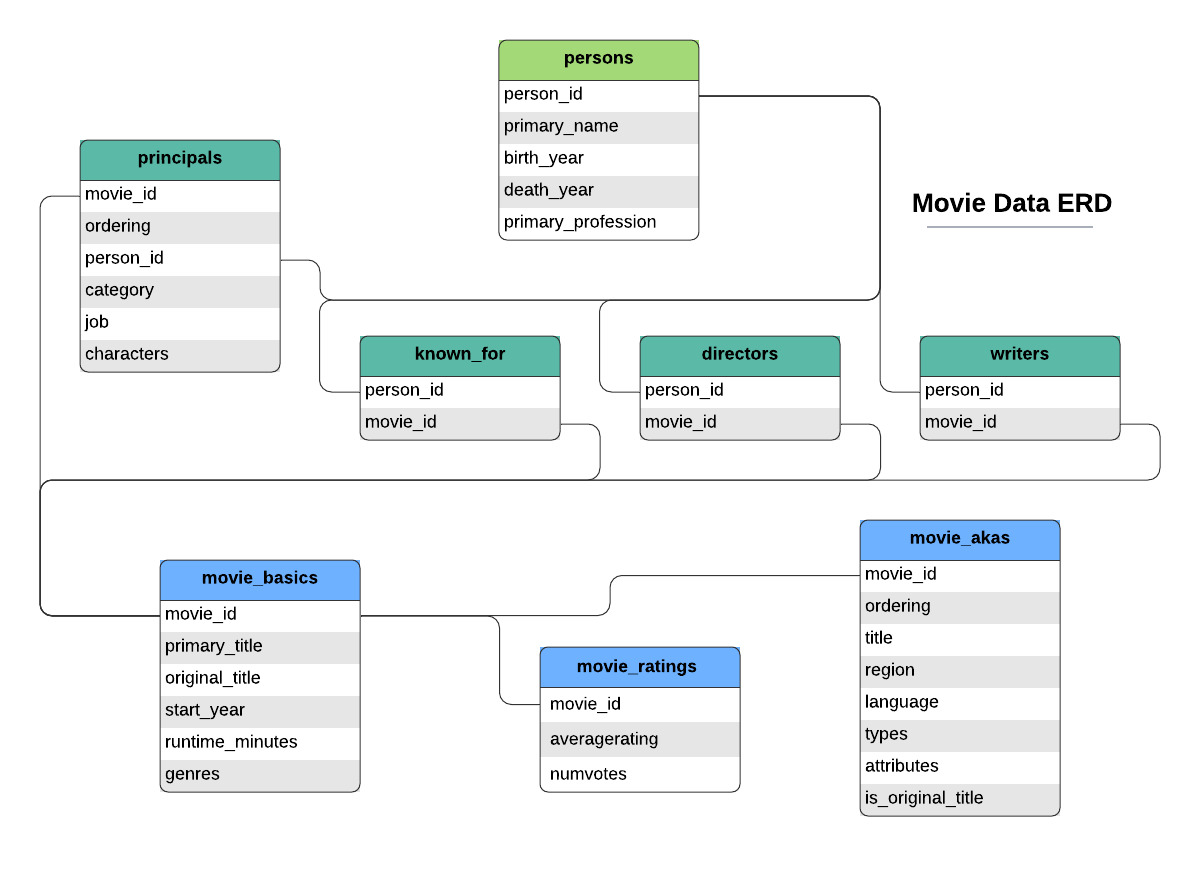

In [4]:
from IPython.display import Image
display(Image(filename='zippedData/imdb Database.jpg'))

Using SQL, we then created a dataframe that contains the values within the movie_basics and movie_ratings tables, giving us some of our variables that we will use to differentiate profitablity.

In [5]:
movie_basics = """SELECT * FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;"""
movie_basics_db = pd.read_sql(movie_basics,conn)
movie_basics_db

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


Now that one of our tables is set up, we want to look at what kind of information is stored in the Box Office Movies Database

In [6]:
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


As you can see, options for merging these two tables is limited to just the title itself. however, our movie_basics_df doesnt have a key as "title" in it, so we must change that to be able to do a proper merging of the two dataframes

In [7]:
movie_basics_db = movie_basics_db.rename(columns={'primary_title': 'title'})
movie_basics_db

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


Now we are able to properly merge the two databases. we opted to use an 'inner' merge as incomplete data from either table would prevent us from performing our final analyzation.

In [8]:
Merged_Movie_DB = movie_basics_db.merge(bom, on='title', how='inner')
Merged_Movie_DB

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018


Great! we have our main database set up. Now to use it to analyze some of the profitability, we will clean it up a bit by removing some of the duplicate or unneeded columns.

In [9]:
Merged_Movie_DB = Merged_Movie_DB.drop(columns='original_title')

In [10]:
Merged_Movie_DB.head()

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


from here we opted to remove any movie with numvotes of less than 100, as this can create signifcant selection bias and may result in exagerated ratings.

In [11]:
Merged_Movie_DB = Merged_Movie_DB[Merged_Movie_DB['numvotes'] >= 100]

In [12]:
Merged_Movie_DB.head()

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014


To make this analysis a bit easier, as I am behind on the course itself. we opted to look partiuclarly at forign_gross. Many films appear only have a domestric gross. Another option for this would be to create a new key with "overall_gross". then those with only domestric gross will have domestric_gross = overall_grosss; while those with forign_gross will have forign_gross = overall_gross.

In [13]:
Merged_Movie_DB = Merged_Movie_DB.dropna(subset=['foreign_gross'])
Merged_Movie_DB

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
6,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015
...,...,...,...,...,...,...,...,...,...,...,...
3008,tt7752454,Detective Chinatown 2,2018,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000,2018
3010,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018
3017,tt8097306,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
3023,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018


In [14]:
Merged_Movie_DB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1655 entries, 1 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1655 non-null   object 
 1   title            1655 non-null   object 
 2   start_year       1655 non-null   int64  
 3   runtime_minutes  1651 non-null   float64
 4   genres           1655 non-null   object 
 5   averagerating    1655 non-null   float64
 6   numvotes         1655 non-null   int64  
 7   studio           1653 non-null   object 
 8   domestic_gross   1636 non-null   float64
 9   foreign_gross    1655 non-null   object 
 10  year             1655 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 155.2+ KB


Now we removed movies with missing run_time minutes as it is one of the categories we are interested in.

In [15]:
Merged_Movie_DB = Merged_Movie_DB.dropna(subset=['runtime_minutes'])
Merged_Movie_DB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651 entries, 1 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1651 non-null   object 
 1   title            1651 non-null   object 
 2   start_year       1651 non-null   int64  
 3   runtime_minutes  1651 non-null   float64
 4   genres           1651 non-null   object 
 5   averagerating    1651 non-null   float64
 6   numvotes         1651 non-null   int64  
 7   studio           1649 non-null   object 
 8   domestic_gross   1632 non-null   float64
 9   foreign_gross    1651 non-null   object 
 10  year             1651 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 154.8+ KB


In [16]:
Merged_Movie_DB.head()

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
6,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015


In [17]:
Merged_Movie_DB = Merged_Movie_DB.drop(3)

Droped index 3 because it is the same as index 1 ; we then went through all of the duplicate named movies by title and removed one. 

In [18]:
Duplicates = Merged_Movie_DB.duplicated(subset=['title'])
Merged_Movie_DB[Duplicates]

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
52,tt3070502,Unstoppable,2013,65.0,Documentary,4.3,551,Fox,81600000.0,86200000,2010
53,tt9225192,Unstoppable,2018,116.0,"Action,Crime",6.5,576,Fox,81600000.0,86200000,2010
92,tt2130270,The Mule,2014,103.0,"Comedy,Crime,Drama",6.3,5788,WB,103800000.0,68700000,2018
93,tt7959026,The Mule,2018,116.0,"Crime,Drama,Thriller",7.1,58955,WB,103800000.0,68700000,2018
115,tt3231054,Risen,2016,107.0,"Action,Adventure,Drama",6.3,22813,Sony,36900000.0,9200000,2016
...,...,...,...,...,...,...,...,...,...,...,...
2330,tt6266538,Vice,2018,132.0,"Biography,Comedy,Drama",7.2,72855,Annapurna,47800000.0,28200000,2018
2348,tt6006924,The Night Before,2017,81.0,Horror,4.7,150,Sony,43000000.0,9300000,2015
2359,tt3569230,Legend,2015,132.0,"Biography,Crime,Drama",7.0,138947,Uni.,1900000.0,41100000,2015
2421,tt4481414,Gifted,2017,101.0,Drama,7.6,82426,FoxS,24800000.0,18200000,2017


In [19]:
Merged_Movie_DB = Merged_Movie_DB.drop_duplicates(subset=['title'])
Merged_Movie_DB

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
6,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015
8,tt3079380,Spy,2015,119.0,"Action,Comedy,Crime",7.0,213908,Fox,110800000.0,124800000,2015
...,...,...,...,...,...,...,...,...,...,...,...
3008,tt7752454,Detective Chinatown 2,2018,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000,2018
3010,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018
3017,tt8097306,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
3023,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018


From here, we can begin grouping up data based on factors we are interested. we started with genre as it already categorical and can be grouped easily without any additional work. However, the foreign gross is still an object and as such will unable to be aggregated properly. therefore we opted to convert it to float. We also noticed that when such movies hits 1billion, they convert to using commas and each number is to the millionth.

In [20]:
Merged_Movie_DB['foreign_gross'].str.contains(',')

1       False
4       False
5       False
6        True
8       False
        ...  
3008    False
3010    False
3017    False
3023    False
3026    False
Name: foreign_gross, Length: 1551, dtype: bool

In [21]:
Merged_Movie_DB['foreign_gross'] = Merged_Movie_DB['foreign_gross'].apply(lambda x: float(x.replace(',', '')) * 1000000 if ',' in x else float(x))
Merged_Movie_DB

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.000000e+06,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,1.299000e+08,2013
5,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,2.690000e+07,2014
6,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,1.019400e+09,2015
8,tt3079380,Spy,2015,119.0,"Action,Comedy,Crime",7.0,213908,Fox,110800000.0,1.248000e+08,2015
...,...,...,...,...,...,...,...,...,...,...,...
3008,tt7752454,Detective Chinatown 2,2018,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,5.421000e+08,2018
3010,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,3.530000e+07,2018
3017,tt8097306,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1.800000e+06,2018
3023,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,8.210000e+07,2018


## <p style="text-align:center;"> Preparing Data: Genre

Here we want to look at Genre, however, each genre object is a string that conatins several genre types seperated by commas, in order to orgnaize it, we used the split function with lambda to make each of those objects a list of the genre types for each respective movie. 

In [22]:
Merged_Movie_DB['genres'] = Merged_Movie_DB['genres'].apply(lambda x: x.split(','))

In [23]:
Merged_Movie_DB.head()

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,2012,124.0,"[Adventure, Drama, Romance]",6.1,37886,IFC,744000.0,8.000000e+06,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",7.3,275300,Fox,58200000.0,1.299000e+08,2013
5,tt0365907,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]",6.5,105116,Uni.,26300000.0,2.690000e+07,2014
6,tt0369610,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,Uni.,652300000.0,1.019400e+09,2015
8,tt3079380,Spy,2015,119.0,"[Action, Comedy, Crime]",7.0,213908,Fox,110800000.0,1.248000e+08,2015


Now that each movie has a list of genres it can be classified as, there are many ways to actually evaluate them, for example, one could go by grouped subtypes (ex. action adventure) or go by the single most descriptive genre type. We have opted to a have movies count for each genre that it is designated. To do this we used the explode function to generate a duplicate of each movie, but with different genre assigned. 

In [24]:
Genre_exploded  = Merged_Movie_DB.explode('genres')
Genre_exploded

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,2012,124.0,Adventure,6.1,37886,IFC,744000.0,8000000.0,2012
1,tt0337692,On the Road,2012,124.0,Drama,6.1,37886,IFC,744000.0,8000000.0,2012
1,tt0337692,On the Road,2012,124.0,Romance,6.1,37886,IFC,744000.0,8000000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,Adventure,7.3,275300,Fox,58200000.0,129900000.0,2013
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,Comedy,7.3,275300,Fox,58200000.0,129900000.0,2013
...,...,...,...,...,...,...,...,...,...,...,...
3017,tt8097306,Nobody's Fool,2018,110.0,Drama,4.6,3618,Par.,31700000.0,1800000.0,2018
3017,tt8097306,Nobody's Fool,2018,110.0,Romance,4.6,3618,Par.,31700000.0,1800000.0,2018
3023,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000.0,2018
3026,tt9151704,Burn the Stage: The Movie,2018,84.0,Documentary,8.8,2067,Trafalgar,4200000.0,16100000.0,2018


In [25]:
Final_Genre_Grouped_df = Genre_exploded.groupby('genres').mean()

In [26]:
Final_Genre_Grouped_df.sort_values('foreign_gross', ascending=False).head()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
genres,,,,,,,
Sci-Fi,2013.878505,117.457944,6.606542,305301.280374,1.349680e+08,2.386060e+08,2013.962617
Adventure,2014.011204,111.725490,6.514286,186813.140056,1.140444e+08,2.194886e+08,2014.151261
Animation,2013.841667,95.933333,6.647500,97439.850000,1.044665e+08,1.981826e+08,2014.116667
Action,2013.805936,115.666667,6.444064,173714.420091,8.442580e+07,1.618641e+08,2013.972603
Fantasy,2013.512397,111.884298,6.240496,142055.578512,6.969247e+07,1.433263e+08,2013.727273


In [27]:
Top_10_Genres = Final_Genre_Grouped_df.sort_values('foreign_gross', ascending=False).head(10)

Our "Top_10_Genres" Database will serve as the database for which we plot and analyze the data further on. As far as analyzing our next variable: Studio, we will be returning to our previous "combined_df" database.

## <p style="text-align:center;"> Preparing Data: Studio

In [28]:
Studios = Merged_Movie_DB.groupby('studio').mean()
Studios.head()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
studio,,,,,,,
3D,2010.000000,41.000000,6.900000,364.000000,6.100000e+06,9.900000e+06,2010.0
A24,2014.933333,107.466667,6.806667,125941.866667,1.439629e+07,1.287333e+07,2015.4
AF,2012.000000,105.000000,7.200000,11292.000000,1.000000e+06,3.100000e+06,2012.0
AR,2016.000000,118.000000,4.900000,811.000000,3.500000e+05,5.770000e+07,2016.0
ATO,2010.500000,104.500000,6.000000,9860.500000,5.067500e+05,4.173500e+05,2011.5


In [29]:
Top_15_Studios = Studios.sort_values('foreign_gross', ascending=False).head(15)
Top_15_Studios.head()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
studio,,,,,,,
HC,2017.000000,123.000000,6.200000,5684.000000,2.700000e+06,8.676000e+08,2017.000000
P/DW,2010.900000,101.500000,6.760000,213462.000000,1.682900e+08,3.393600e+08,2010.900000
BV,2013.880952,113.738095,6.948810,215591.845238,1.720655e+08,2.702887e+08,2014.011905
GrtIndia,2017.000000,167.000000,8.300000,65656.000000,2.020000e+07,2.340000e+08,2017.000000
Fox,2013.652174,109.286957,6.367826,158246.165217,8.360261e+07,1.545988e+08,2013.834783


Our "Top_30_Studios" Database will also serve us in the future when we graph and analyze the data.

## <p style="text-align:center;"> Preparing Data: Run Time

Becuase runtime has many little datapoints, evaluating such a variable as a trend would be better encopased in a scatter plot. Therefore no additional will be needed for this. 

# <p style="text-align:center;"> Graphing and Analysis 

In [30]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## <p style="text-align:center;"> Comparing Average Forign Gross Across Genre

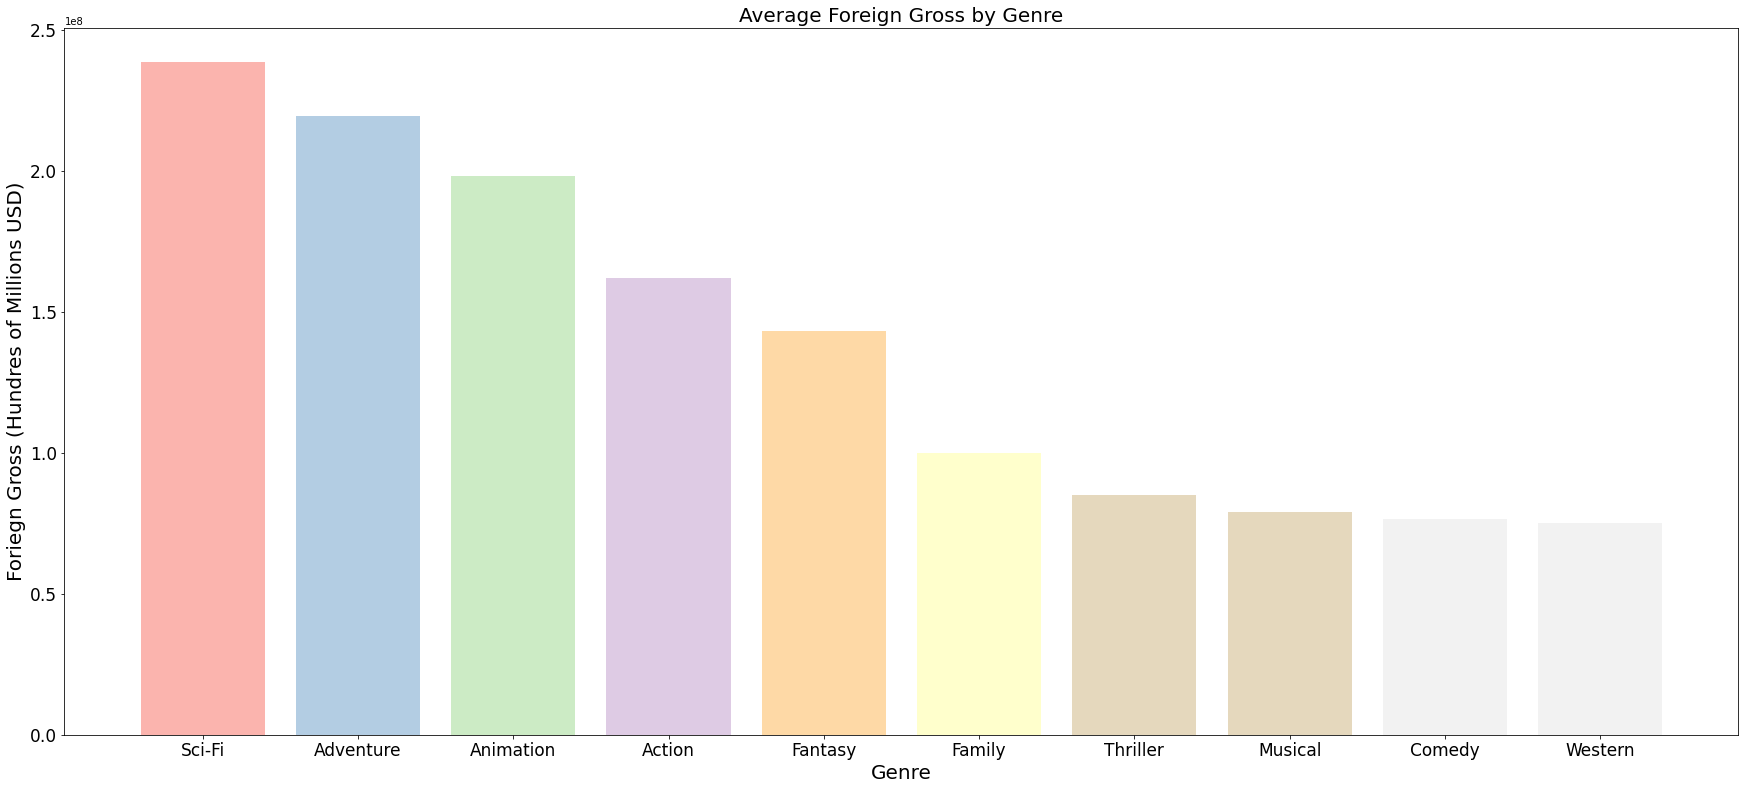

In [31]:
plt.figure(figsize=(30,13))

colors = plt.cm.Pastel1(np.linspace(0, 1, len(Top_10_Genres)))

plt.bar(Top_10_Genres.index, Top_10_Genres['foreign_gross'], color=colors)
plt.title('Average Foreign Gross by Genre', fontsize=20)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Foriegn Gross (Hundres of Millions USD)', fontsize=20)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)

plt.show()

As we can see, Sci-Fi, Adventure, and animation are among the highest grossing movies worldwide.

## <p style="text-align:center;"> Comparing Average Forign Gross Across Studio

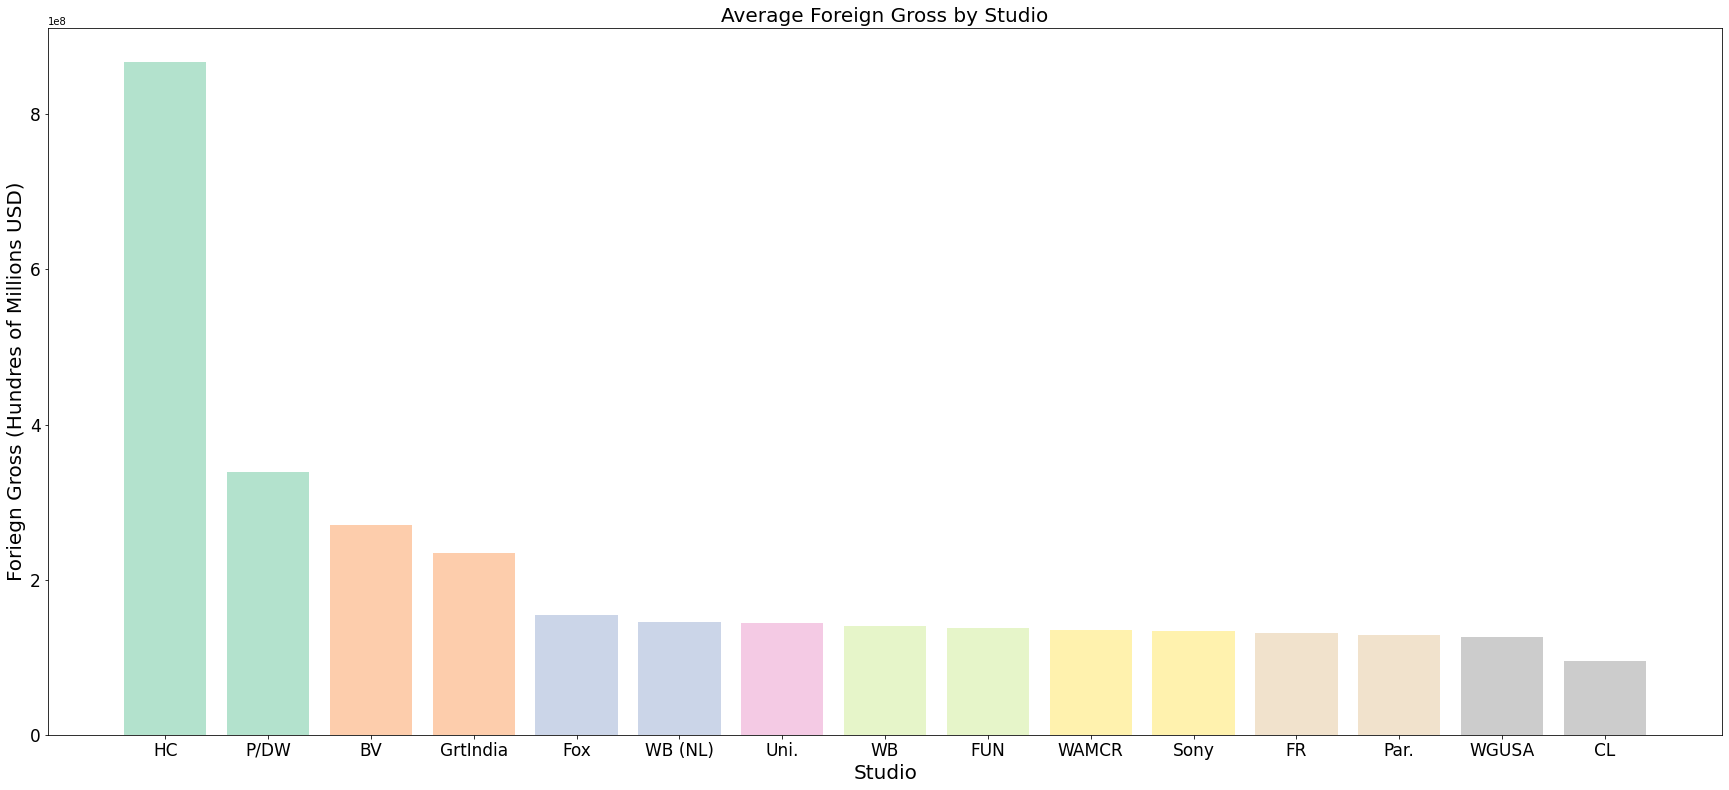

In [32]:
plt.figure(figsize=(30,13))

colors = plt.cm.Pastel2(np.linspace(0, 1, len(Top_15_Studios)))

plt.bar(Top_15_Studios.index, Top_15_Studios['foreign_gross'], color=colors)
plt.title('Average Foreign Gross by Studio', fontsize=20)
plt.xlabel('Studio', fontsize=20)
plt.ylabel('Foriegn Gross (Hundres of Millions USD)', fontsize=20)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)

plt.show()

Although HC may be considered an outlier due to its sigifnicantly larger grossing movies, we opted to keep it within the dataset analyzed as it would still be valuable to the company to potentially study or aquire at some point.

## <p style="text-align:center;"> Comparing Average Forign Gross by Overall Run Time

When evaluating Runtime, it would be best to evaluate the trend. One would like to use a linear regression to develop a formula basing the projected forgien gross based on movie run time, however, from just looking at this plot, the stength of such a regression would be small. Either way, there is an increasing trend of movies having larger runtimes generally having larger foriegn domestic sales.

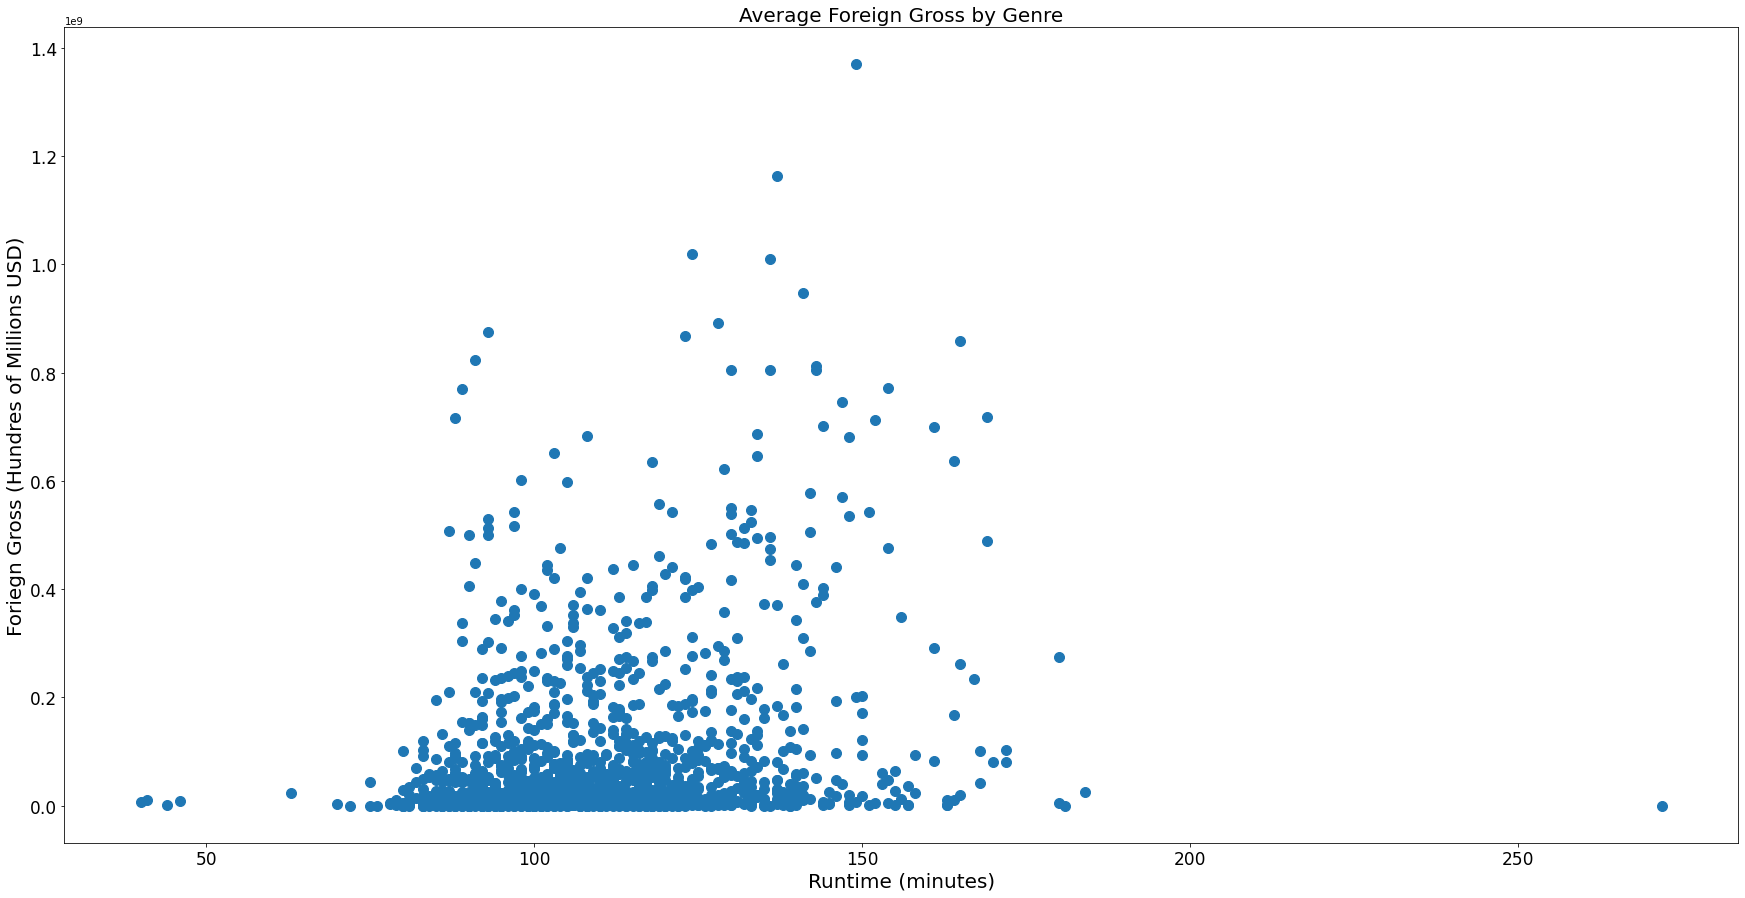

In [33]:
plt.figure(figsize=(30,15))

plt.scatter(Merged_Movie_DB['runtime_minutes'], Merged_Movie_DB['foreign_gross'], s=100)
plt.title('Average Foreign Gross by Genre', fontsize=20)
plt.xlabel('Runtime (minutes)', fontsize=20)
plt.ylabel('Foriegn Gross (Hundres of Millions USD)', fontsize=20)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)

plt.show()

Foreign gross appears to have a trend of increasing as the runtime increases, however the slope is likely small. thus having a film that is on average, a bit longer may be more profitable.

# <p style="text-align:center;"> Conclusions

Based on the data above, we have determined in order to develop a movie with the most sales it should:

* Have the Genre: Sci-fi, Adventure, or Animation - as they are the genres that generate the most foreign gross revenue 

* Be developped by HC, but if not, P/DW, BV, or GrtIndia are other good options

* Finally, as far as runtime, the movie should on the longerside, from 100 to 150 minutes